In [2]:
#STEPS for KNN inspired model (K-Next Neighbor)
    #1- Normalize player data across seasons
    #2 - Find 10 most similar player seasons historically
    #3 - Rank and weight each of those 10 players season stats
    #4 - Look at 10 players following season stats
    #5 - Use weighted averages to predict current players next season
    #6 - Rinse and repeat for every player in 2021-2022

# Cleaning NBA Data

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [169]:
stats = ['pts',
        'min',
        'fgm',
        'fga',
        'fg3m',
        'fg3a',
        'ftm',
        'fta',
        'oreb',
        'dreb',
        'ast',
        'stl',
        'tov',
        'blk']

In [170]:
#per game data from csv
df= pd.read_csv('D:/Python Portfolio Projects/NBA Projection/nba-stats-model-master/nba-stats-csv/player_general_traditional_per_game_data.csv', header = 0)

In [171]:
df.head(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
0,471,1996-97,41.0,NaN,13.3,1.1,3.3,0.331,0.2,0.7,...,1.0,1.2,0.875,0.7,1.8,1.4,0.8,0.2,0.3,3.4
1,920,1996-97,83.0,33.0,30.8,2.8,5.8,0.483,0.0,0.2,...,1.5,2.4,0.650,2.7,5.2,0.8,0.9,0.8,0.2,7.2
2,243,1996-97,83.0,24.0,20.4,1.8,4.4,0.411,0.5,1.2,...,1.1,1.3,0.836,0.5,2.2,1.9,1.1,0.9,0.3,5.2
3,1425,1996-97,33.0,25.0,17.8,2.6,4.5,0.574,0.0,0.0,...,1.0,1.5,0.673,1.9,2.5,0.5,1.0,0.5,0.9,6.2
4,768,1996-97,47.0,27.0,11.1,1.4,3.8,0.374,0.0,0.1,...,1.1,1.8,0.643,0.7,1.3,0.4,0.7,0.3,0.6,4.0
5,228,1996-97,62.0,27.0,15.4,1.3,2.6,0.513,0.0,0.0,...,1.1,1.7,0.689,1.2,2.3,0.5,0.7,0.5,0.2,3.8
6,154,1996-97,45.0,30.0,13.1,0.9,2.0,0.435,0.0,0.0,...,0.5,1.1,0.420,1.3,2.4,0.3,0.6,0.4,0.2,2.2
7,673,1996-97,30.0,24.0,17.2,2.6,5.4,0.475,0.0,0.0,...,1.5,2.5,0.600,1.6,2.3,0.8,1.0,0.7,0.2,6.6
8,1059,1996-97,8.0,29.0,7.9,1.0,2.0,0.500,0.6,0.9,...,0.5,0.6,0.800,0.1,0.5,0.6,0.6,0.0,0.0,3.1
9,275,1996-97,81.0,26.0,34.3,5.4,12.7,0.423,1.8,4.7,...,2.2,2.7,0.803,0.5,2.4,2.2,2.1,0.5,0.2,14.8


In [172]:
df.tail(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
10623,201163,2018-19,51.0,31.0,23.1,2.2,5.4,0.418,1.2,3.1,...,0.4,0.5,0.720,0.9,3.3,1.6,0.9,0.5,0.4,6.0
10624,1628999,2018-19,2.0,22.0,6.5,0.5,2.0,0.250,0.0,0.5,...,0.0,0.0,0.000,0.5,1.0,0.0,0.0,0.5,0.0,1.0
10625,1627812,2018-19,71.0,25.0,15.0,2.2,5.0,0.435,0.8,2.1,...,0.8,0.9,0.896,0.2,1.4,1.9,0.6,0.5,0.1,5.9
10626,1629139,2018-19,15.0,24.0,11.6,1.0,3.4,0.294,0.1,1.1,...,0.5,0.7,0.700,0.3,1.8,0.5,0.4,0.3,0.1,2.6
10627,1628380,2018-19,77.0,21.0,17.6,2.5,5.2,0.473,0.5,1.6,...,1.2,1.6,0.746,1.4,2.8,0.9,1.0,0.3,0.9,6.6
10628,203897,2018-19,63.0,24.0,34.5,8.4,18.0,0.467,1.9,5.1,...,5.0,6.0,0.832,0.6,4.0,4.5,3.4,1.0,0.4,23.7
10629,1629155,2018-19,1.0,26.0,3.8,0.0,1.0,0.000,0.0,1.0,...,0.0,0.0,0.000,0.0,0.0,0.0,1.0,1.0,0.0,0.0
10630,2585,2018-19,68.0,35.0,12.9,1.3,2.8,0.440,0.0,0.1,...,1.4,1.8,0.782,1.5,2.4,1.3,0.8,0.5,0.3,3.9
10631,1629015,2018-19,6.0,19.0,18.4,2.3,5.7,0.412,1.0,2.7,...,1.0,1.3,0.750,0.5,1.7,1.7,1.0,0.3,0.3,6.7
10632,1627753,2018-19,1.0,23.0,1.0,1.0,1.0,1.000,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [173]:
df.sample(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
2105,1714,2000-01,70.0,24.0,17.3,2.3,4.6,0.497,0.0,0.0,...,1.1,2.0,0.567,1.8,2.5,0.9,1.4,0.7,1.1,5.7
4583,101141,2006-07,66.0,20.0,14.7,2.1,5.5,0.383,0.8,2.2,...,1.1,1.3,0.787,0.9,2.0,0.7,0.8,0.4,0.3,6.1
3619,239,2004-05,11.0,34.0,17.2,1.5,4.5,0.320,0.5,1.6,...,0.5,0.7,0.625,0.3,0.6,2.5,0.5,0.5,0.0,3.8
2704,2456,2002-03,15.0,23.0,5.9,0.3,1.3,0.250,0.0,0.0,...,0.3,0.7,0.400,0.4,0.5,0.1,0.5,0.0,0.4,0.9
10537,201583,2018-19,25.0,30.0,12.9,0.8,2.8,0.304,0.4,1.6,...,0.5,0.6,0.750,0.7,1.4,0.8,0.6,0.2,0.0,2.5
4735,1720,2006-07,56.0,30.0,12.5,1.5,3.1,0.469,0.0,0.0,...,0.6,0.7,0.878,0.8,2.0,0.4,0.5,0.3,0.3,3.6
8156,203078,2014-15,63.0,22.0,33.5,5.8,13.5,0.427,1.7,4.1,...,2.1,2.6,0.783,0.9,2.9,3.1,2.0,1.2,0.3,15.3
3668,697,2004-05,76.0,32.0,16.7,1.8,3.7,0.489,0.9,1.9,...,1.2,1.3,0.873,0.4,2.0,1.1,0.3,0.7,0.2,5.8
5643,714,2008-09,81.0,36.0,28.8,3.7,8.5,0.437,1.6,3.9,...,0.6,0.8,0.823,0.3,3.0,1.4,0.8,0.5,0.2,9.7
8542,203915,2014-15,34.0,22.0,13.4,1.5,5.0,0.302,0.4,1.9,...,0.9,1.0,0.912,0.1,1.3,3.1,1.0,0.6,0.2,4.3


In [174]:
list(df)

['player_id',
 'season_id',
 'gp',
 'age',
 'min',
 'fgm',
 'fga',
 'fg_pct',
 'fg3m',
 'fg3a',
 'fg3_pct',
 'ftm',
 'fta',
 'ft_pct',
 'oreb',
 'dreb',
 'ast',
 'tov',
 'stl',
 'blk',
 'pts']

In [175]:
df_cleaned = df.dropna(how='all')

In [176]:
df_cleaned['gp'].describe()

count    10633.000000
mean        52.633782
std         25.115265
min          1.000000
25%         33.000000
50%         59.000000
75%         75.000000
max         85.000000
Name: gp, dtype: float64

<AxesSubplot:>

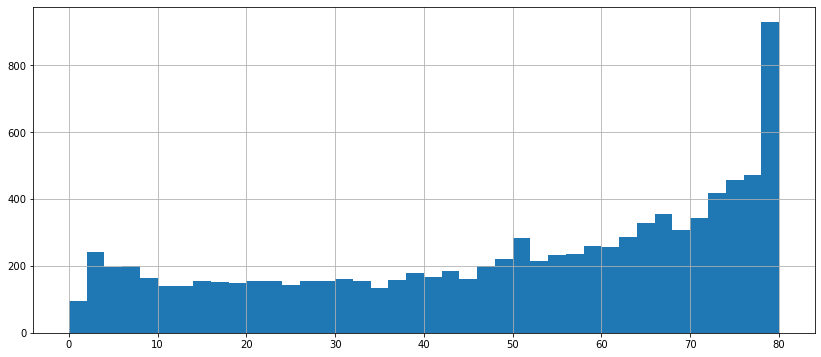

In [177]:
bin_values = np.arange(start=0, stop=82, step=2)
df_cleaned['gp'].hist(bins=bin_values, figsize=[14,6])

In [178]:
min_gp = 10
df_filter = df_cleaned[df_cleaned['gp'] > min_gp]

In [179]:
x = df_cleaned['player_id'].count()
y = df_filter['player_id'].count()
print(x-y)

971


# Normalize data across seasons

In [180]:
season = (df_filter['season_id'] == '2017-18')

In [181]:
df_2018 = df_filter[season]

In [182]:
df_2018.sample(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
9792,201160,2017-18,33.0,32.0,8.6,1.4,3.5,0.391,0.1,1.0,...,0.6,0.6,0.905,0.5,1.1,0.4,0.5,0.1,0.4,3.4
10053,2225,2017-18,55.0,36.0,19.5,3.2,7.1,0.459,0.2,0.7,...,1.0,1.4,0.705,0.1,1.6,3.5,1.2,0.5,0.0,7.7
9696,203079,2017-18,30.0,26.0,30.6,5.4,13.7,0.398,1.7,5.7,...,1.7,2.3,0.739,0.3,2.3,3.8,2.3,0.8,0.3,14.3
9890,1628366,2017-18,52.0,20.0,34.2,3.9,10.8,0.360,1.7,5.7,...,0.6,1.4,0.451,1.3,5.6,7.2,2.6,1.7,0.8,10.2
9964,1626181,2017-18,70.0,25.0,15.2,2.1,5.3,0.401,0.8,2.7,...,0.5,0.6,0.821,0.2,1.5,1.3,0.9,0.5,0.2,5.5
9863,201142,2017-18,68.0,29.0,34.2,9.3,18.0,0.516,2.5,6.1,...,5.3,5.9,0.889,0.5,6.4,5.4,3.0,0.7,1.8,26.4
9759,200826,2017-18,69.0,34.0,23.2,4.4,10.0,0.439,1.7,4.5,...,1.2,1.5,0.784,0.2,2.7,6.3,2.1,0.5,0.0,11.6
9588,1628510,2017-18,15.0,25.0,13.9,1.7,4.9,0.342,1.2,3.3,...,0.1,0.3,0.250,0.3,2.0,0.4,0.5,0.2,0.1,4.6
9801,203924,2017-18,81.0,24.0,20.3,3.0,5.6,0.535,0.4,1.4,...,2.0,3.0,0.675,1.1,2.9,0.7,0.7,0.4,1.0,8.4
10005,1626220,2017-18,69.0,25.0,16.7,1.7,4.1,0.423,0.6,1.7,...,0.9,1.1,0.803,0.4,3.1,1.4,0.8,0.5,0.2,5.0


In [183]:
df_2018['pts_norm'] = (df_2018['pts'] - df_2018['pts'].min()) / (df_2018['pts'].max() - df_2018['pts'].min()) 

<ipython-input-183-ca2043cccc21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['pts_norm'] = (df_2018['pts'] - df_2018['pts'].min()) / (df_2018['pts'].max() - df_2018['pts'].min())


In [184]:
df_2018.sort_values('pts_norm', ascending=False).head(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts,pts_norm
9781,201935,2017-18,72.0,28.0,35.4,9.0,20.1,0.449,3.7,10.0,...,10.1,0.858,0.6,4.8,8.8,4.4,1.8,0.7,30.4,1.000000
9592,203076,2017-18,75.0,25.0,36.4,10.4,19.5,0.534,0.7,2.2,...,8.0,0.828,2.5,8.6,2.3,2.2,1.5,2.6,28.1,0.923077
9888,2544,2017-18,82.0,33.0,36.9,10.5,19.3,0.542,1.8,5.0,...,6.5,0.731,1.2,7.5,9.1,4.2,1.4,0.9,27.5,0.903010
9650,203081,2017-18,73.0,27.0,36.6,8.5,19.4,0.439,3.1,8.6,...,7.4,0.916,0.8,3.6,6.6,2.8,1.1,0.4,26.9,0.882943
9737,203507,2017-18,75.0,23.0,36.7,9.9,18.7,0.529,0.6,1.9,...,8.5,0.760,2.1,8.0,4.8,3.0,1.5,1.4,26.9,0.882943
9863,201142,2017-18,68.0,29.0,34.2,9.3,18.0,0.516,2.5,6.1,...,5.9,0.889,0.5,6.4,5.4,3.0,0.7,1.8,26.4,0.866221
10028,201939,2017-18,51.0,30.0,32.0,8.4,16.9,0.495,4.2,9.8,...,5.9,0.921,0.7,4.4,6.1,3.0,1.6,0.2,26.4,0.866221
10008,201566,2017-18,80.0,29.0,36.4,9.5,21.1,0.449,1.2,4.1,...,7.1,0.737,1.9,8.2,10.3,4.8,1.8,0.3,25.4,0.832776
9676,202326,2017-18,48.0,27.0,36.2,8.5,18.0,0.470,2.2,6.1,...,8.2,0.746,2.2,10.7,5.4,5.0,1.6,1.6,25.2,0.826087
9690,1626164,2017-18,54.0,21.0,34.5,8.4,19.5,0.432,2.7,7.1,...,6.1,0.878,0.5,4.0,4.7,3.6,0.9,0.3,24.9,0.816054


In [185]:
#doing the above process on all columns, col is input
def normalize(col):
    return (col - col.min()) / (col.max() - col.min())

In [186]:
normalize(df_2018['fgm'])

9563     0.076923
9564     0.615385
9567     0.086538
9569     0.480769
9570     0.288462
           ...   
10098    0.153846
10099    0.538462
10100    0.576923
10101    0.201923
10102    0.019231
Name: fgm, Length: 463, dtype: float64

In [187]:
cols_to_norm = ['pts',
        'min',
        'fgm',
        'fga',
        'fg3m',
        'fg3a',
        'ftm',
        'fta',
        'oreb',
        'dreb',
        'ast',
        'stl',
        'tov',
        'blk']

In [188]:
#for loop to turn all columns normalized
def vorp(df):
    for col_name in cols_to_norm:
        df['{}_norm'.format(col_name)] = normalize(df[col_name])
    return df

In [189]:
df_2018_norm = vorp(df_2018)

<ipython-input-188-4a0f083c1f09>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['{}_norm'.format(col_name)] = normalize(df[col_name])


In [190]:
df_2018_norm.sample(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3m_norm,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm
9721,101141,2017-18,69.0,31.0,25.1,4.0,8.9,0.452,1.3,3.7,...,0.309524,0.37,0.172414,0.198020,0.333333,0.373832,0.126214,0.375000,0.20,0.153846
9941,1628462,2017-18,45.0,31.0,25.2,3.4,8.0,0.419,2.0,5.2,...,0.476190,0.52,0.103448,0.099010,0.078431,0.205607,0.446602,0.208333,0.44,0.038462
9735,101123,2017-18,41.0,32.0,22.7,4.1,10.1,0.407,2.7,7.3,...,0.642857,0.73,0.137931,0.148515,0.078431,0.252336,0.058252,0.250000,0.16,0.153846
9715,1626144,2017-18,64.0,22.0,19.4,3.2,8.2,0.388,0.7,2.3,...,0.166667,0.23,0.172414,0.198020,0.078431,0.168224,0.310680,0.250000,0.36,0.076923
9638,203991,2017-18,74.0,24.0,27.5,6.0,9.1,0.652,0.0,0.0,...,0.000000,0.00,0.218391,0.346535,0.647059,0.691589,0.087379,0.333333,0.28,0.730769
10043,1627748,2017-18,74.0,21.0,16.7,1.8,4.3,0.411,0.4,1.4,...,0.095238,0.14,0.103448,0.128713,0.196078,0.168224,0.058252,0.208333,0.12,0.269231
9625,1628403,2017-18,27.0,21.0,7.0,0.9,2.2,0.400,0.0,0.3,...,0.000000,0.03,0.045977,0.069307,0.117647,0.112150,0.048544,0.083333,0.14,0.038462
9759,200826,2017-18,69.0,34.0,23.2,4.4,10.0,0.439,1.7,4.5,...,0.404762,0.45,0.137931,0.148515,0.039216,0.233645,0.611650,0.208333,0.42,0.000000
9574,1628409,2017-18,20.0,23.0,11.2,1.4,3.7,0.378,0.9,2.9,...,0.214286,0.29,0.045977,0.049505,0.078431,0.121495,0.058252,0.041667,0.04,0.038462
9708,2548,2017-18,67.0,36.0,22.9,4.5,10.2,0.438,0.5,1.7,...,0.119048,0.17,0.229885,0.277228,0.137255,0.261682,0.330097,0.375000,0.42,0.269231


In [191]:
list(df_2018_norm)

['player_id',
 'season_id',
 'gp',
 'age',
 'min',
 'fgm',
 'fga',
 'fg_pct',
 'fg3m',
 'fg3a',
 'fg3_pct',
 'ftm',
 'fta',
 'ft_pct',
 'oreb',
 'dreb',
 'ast',
 'tov',
 'stl',
 'blk',
 'pts',
 'pts_norm',
 'min_norm',
 'fgm_norm',
 'fga_norm',
 'fg3m_norm',
 'fg3a_norm',
 'ftm_norm',
 'fta_norm',
 'oreb_norm',
 'dreb_norm',
 'ast_norm',
 'stl_norm',
 'tov_norm',
 'blk_norm']

In [192]:
grouped = df_filter.groupby('season_id')
grouped['pts'].mean()

season_id
1996-97    8.623559
1997-98    8.562944
1998-99    8.232000
1999-00    8.531250
2000-01    8.357071
2001-02    8.404444
2002-03    8.299244
2003-04    8.422727
2004-05    8.573934
2005-06    8.368925
2006-07    8.683962
2007-08    8.747837
2008-09    9.014425
2009-10    8.913494
2010-11    8.661283
2011-12    8.370670
2012-13    8.441109
2013-14    8.616173
2014-15    8.635398
2015-16    8.805923
2016-17    8.960586
2017-18    8.979266
2018-19    9.361472
Name: pts, dtype: float64

In [193]:
df_new = df_filter.groupby(['season_id']).apply(vorp)
df_new.sample(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3m_norm,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm
2393,469,2001-02,40.0,29.0,39.9,7.6,18.6,0.407,1.0,2.8,...,0.303030,0.350000,0.670886,0.560748,0.160000,0.559140,0.388889,0.392857,0.692308,0.057143
1293,1503,1998-99,49.0,20.0,22.5,3.4,7.9,0.436,0.2,0.7,...,0.071429,0.098592,0.298701,0.313725,0.479167,0.326087,0.212963,0.407407,0.416667,0.333333
7988,201988,2013-14,81.0,25.0,18.9,3.8,8.2,0.464,1.7,3.9,...,0.515152,0.493671,0.103448,0.101010,0.074074,0.159574,0.168224,0.320000,0.189189,0.035714
3668,697,2004-05,76.0,32.0,16.7,1.8,3.7,0.489,0.9,1.9,...,0.310345,0.237500,0.137931,0.123810,0.102564,0.182692,0.095652,0.241379,0.065217,0.060606
6317,201571,2010-11,82.0,23.0,33.6,4.9,11.7,0.416,1.4,4.1,...,0.583333,0.650794,0.434211,0.307692,0.111111,0.192308,0.535088,0.291667,0.487179,0.000000
4916,101106,2007-08,78.0,23.0,34.9,6.0,11.7,0.511,0.0,0.1,...,0.000000,0.013699,0.292683,0.376147,0.756098,0.603774,0.224138,0.296296,0.500000,0.472222
4489,2073,2006-07,28.0,30.0,11.2,1.5,3.0,0.494,0.6,1.6,...,0.200000,0.197531,0.093023,0.086538,0.113636,0.128713,0.094828,0.380952,0.170732,0.000000
10110,203518,2018-19,31.0,25.0,19.0,1.8,5.1,0.357,1.3,4.1,...,0.254902,0.310606,0.041237,0.036364,0.037037,0.118182,0.056075,0.227273,0.100000,0.074074
8475,201600,2014-15,76.0,28.0,26.1,2.8,5.4,0.517,0.0,0.0,...,0.000000,0.000000,0.193182,0.294118,0.603774,0.650000,0.079208,0.173913,0.295455,0.241379
10329,201949,2018-19,55.0,32.0,21.2,3.0,6.9,0.433,0.9,2.7,...,0.176471,0.204545,0.092784,0.118182,0.074074,0.245455,0.233645,0.272727,0.260000,0.185185


# How close 2 players are on a stat 

In [194]:
#Distance function
def calc_distance(u, v):
    dist = np.sqrt(np.sum((u-v)**2))   #classic distance formula
    return dist

In [195]:
df_pname = pd.read_csv('D:/Python Portfolio Projects/NBA Projection/nba-stats-model-master/nba-stats-csv/player_id_player_name.csv')

In [196]:
df_stats = pd.read_csv('D:/Python Portfolio Projects/NBA Projection/nba-stats-model-master/nba-stats-csv/player_general_traditional_per_game_data.csv', usecols=['player_id', 'season_id', 'pts'])

In [197]:
df_pname.sample(5)

,player_id,player_name
315,202693,Markieff Morris
446,1627789,Timothe Luwawu-Cabarrot
266,203484,Kentavious Caldwell-Pope
217,202710,Jimmy Butler
4,203940,Adreian Payne


In [198]:
df_stats.sample(5)

,player_id,season_id,pts
5080,2407,2007-08,3.7
3505,2585,2003-04,3.3
7578,200779,2012-13,6.6
8008,203493,2013-14,2.7
2393,469,2001-02,21.5


In [199]:
df3 = pd.merge(df_pname, df_stats, on='player_id', how='left')

In [200]:
df3.sample(5)

,player_id,player_name,season_id,pts
2734,101109,Raymond Felton,2005-06,11.9
71,202692,Alec Burks,2012-13,7.0
3223,202344,Trevor Booker,2012-13,5.3
2117,2736,Luol Deng,2005-06,14.3
957,2548,Dwyane Wade,2014-15,21.5


In [201]:
df_2019 = df3[df3['season_id'] == '2018-19']

In [202]:
df_2019.sample(5)

,player_id,player_name,season_id,pts
3310,2199,Tyson Chandler,2018-19,3.1
1963,200768,Kyle Lowry,2018-19,14.2
15,203932,Aaron Gordon,2018-19,16.0
2233,202693,Markieff Morris,2018-19,9.4
1120,203507,Giannis Antetokounmpo,2018-19,27.7


In [203]:
dame_df = df_2019[df_2019['player_name'] == 'Damian Lillard']
curry_df = df_2019[df_2019['player_name'] == 'Stephen Curry']
gobert_df = df_2019[df_2019['player_name'] == 'Rudy Gobert']

In [204]:
dame_ppg = dame_df.pts.tolist()[0]
curry_ppg = curry_df.pts.tolist()[0]
gobert_ppg = gobert_df.pts.tolist()[0]

In [205]:
#comparing Dame and curry distance difference
calc_distance(dame_ppg, curry_ppg)

1.5

In [206]:
#comparing Dame and Gobert
calc_distance(dame_ppg, gobert_ppg)

9.9

In [207]:
#This means Dame is more similar to Curry than Dame is to Gobert

# Function that finds a row of data based on player ID and season ID

In [208]:
nba_stats = {
    'first_name':['Lebron', 'Kyle', 'Lonzo', 'Brandon', 'Josh', 'Lance', 'Michael', 'Tyson', 'Ivica'],
    'last_name':['James', 'Kuzma', 'Ball', 'Ingram', 'Hart', 'Stephenson', 'Beasley', 'Chandler', 'Zuba'],
    'ppg':[28.2, 21.1, 14.3, 17.2, 18.2, 11.2, 14.2, 4.5, 6.7,],
    'apg':[12.3, 2.1, 8.9, 2.5, 3.6, 0.2, 1.8, 1.9, 1.5],
    'rpg':[7.1, 5.4, 5.5, 8.1, 3.2, 5.5, 7.7, 2.3, 8.1]
}
laker_df = pd.DataFrame(nba_stats, columns = ['first_name', 'last_name', 'ppg', 'apg', 'rpg'])

In [209]:
for row in laker_df.itertuples():
    print(row.first_name, row.last_name, row.ppg)

Lebron James 28.2
Kyle Kuzma 21.1
Lonzo Ball 14.3
Brandon Ingram 17.2
Josh Hart 18.2
Lance Stephenson 11.2
Michael Beasley 14.2
Tyson Chandler 4.5
Ivica Zuba 6.7


In [210]:
dataframe = pd.read_csv('D:/Python Portfolio Projects/NBA Projection/nba-stats-model-master/nba-stats-csv/player_general_traditional_per_game_data.csv', header = 0)

In [211]:
df_example = dataframe.sample(10)

In [212]:
for row in df_example.itertuples():
    print(row.season_id, row.player_id)

2016-17 1626209
2014-15 2045
2012-13 202719
2016-17 1627850
2017-18 1627733
2012-13 977
1996-97 390
2016-17 203457
2002-03 1609
2005-06 239


In [213]:
def find_player(player_id, player_season):
    for row in df_example.itertuples():
        if player_season == row.season_id and player_id == row.player_id:
            return row

In [214]:
df_example

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
9391,1626209,2016-17,65.0,22.0,14.8,1.8,5.1,0.355,0.7,2.2,...,0.6,0.8,0.800,0.3,1.9,1.0,0.9,0.5,0.2,4.9
8284,2045,2014-15,62.0,36.0,11.4,1.3,3.0,0.441,1.0,2.2,...,0.1,0.2,0.545,0.1,1.5,0.6,0.5,0.3,0.1,3.7
7378,202719,2012-13,21.0,22.0,3.3,0.4,1.1,0.375,0.0,0.0,...,0.2,0.3,0.667,0.3,0.7,0.0,0.3,0.0,0.1,1.0
9395,1627850,2016-17,21.0,24.0,8.1,0.8,1.4,0.533,0.0,0.0,...,0.4,0.9,0.421,1.1,1.3,0.5,0.6,0.2,0.2,1.9
9702,1627733,2017-18,82.0,20.0,25.2,2.3,5.9,0.386,1.4,3.9,...,0.5,0.6,0.765,0.5,3.9,1.6,1.4,0.3,0.6,6.5
7435,977,2012-13,78.0,34.0,38.6,9.5,20.4,0.463,1.7,5.2,...,6.7,8.0,0.839,0.8,4.7,6.0,3.7,1.4,0.3,27.3
368,390,1996-97,56.0,27.0,33.1,4.4,10.2,0.435,1.5,4.2,...,2.2,2.7,0.801,0.5,1.9,1.8,2.1,1.0,0.2,12.5
9422,203457,2016-17,51.0,23.0,20.5,3.6,6.1,0.595,0.0,0.0,...,1.5,2.2,0.694,1.8,3.9,1.0,1.0,1.3,1.0,8.7
2670,1609,2002-03,26.0,30.0,8.1,1.1,2.9,0.373,0.1,0.1,...,0.1,0.4,0.200,0.8,1.5,0.2,0.8,0.2,0.4,2.3
4086,239,2005-06,40.0,35.0,8.5,0.9,2.4,0.351,0.4,1.0,...,0.5,0.6,0.750,0.1,0.5,1.4,0.4,0.4,0.0,2.6


In [215]:
find_player(977, '2011-12')

In [216]:
def find_player(df, player_id, player_season):
    for row in df.itertuples():
        if player_season == row.season_id and player_id == row.player_id:
            return row

In [217]:
player = 2544
season = '2012-13'

In [218]:
find_player(dataframe, player, season)

Pandas(Index=7454, player_id=2544, season_id='2012-13', gp=76.0, age=28.0, min=37.9, fgm=10.1, fga=17.8, fg_pct=0.565, fg3m=1.4, fg3a=3.3, fg3_pct=0.406, ftm=5.3, fta=7.0, ft_pct=0.753, oreb=1.3, dreb=6.8, ast=7.3, tov=3.0, stl=1.7, blk=0.9, pts=26.8)

# Calc player similarity

In [219]:
current_player_season = '2016-17'
current_player_id = 201142

In [220]:
# Read in per game data from csv folder
df = pd.read_csv('D:/Python Portfolio Projects/NBA Projection/nba-stats-model-master/nba-stats-csv/player_general_traditional_per_game_data.csv', header = 0)

In [221]:
df_cleaned = df.dropna(how='all')

In [222]:
min_gp = 10
df_filter = df_cleaned[df_cleaned['gp'] > min_gp]

In [223]:
cols_to_norm = ['pts',
        'min',
        'fgm',
        'fga',
        'fg3m',
        'fg3a',
        'ftm',
        'fta',
        'oreb',
        'dreb',
        'ast',
        'stl',
        'tov',
        'blk']

In [224]:
def vorp(df):
    for col_name in cols_to_norm:
        df['{}_norm'.format(col_name)] = normalize(df[col_name])
    return df

In [225]:
df_norm = df_filter.groupby(['season_id']).apply(vorp)

In [226]:
kd_pts_norm = (df_norm.loc[(df_norm['player_id'] == current_player_id) 
            & (df_norm['season_id'] == current_player_season),
            'pts_norm']).item()

In [227]:
kd_pts_norm

0.788961038961039

In [228]:
current_player_vector = np.array([
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'pts_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'min_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fgm_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fga_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fg3m_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fg3a_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'ftm_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fta_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'oreb_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'dreb_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'ast_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'stl_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'tov_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'blk_norm']).item(),
])

In [229]:
current_player_vector

array([0.78896104, 0.87319885, 0.86138614, 0.67672414, 0.46341463,
       0.5       , 0.58695652, 0.56880734, 0.13953488, 0.73267327,
       0.42342342, 0.55      , 0.375     , 0.61538462])

In [230]:
#Kobe Bryant
compared_player_season = '2010-11'
compared_player_id = 977

In [231]:
compared_player_vector = np.array([
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'pts_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'min_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'fgm_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'fga_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'fg3m_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'fg3a_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'ftm_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'fta_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'oreb_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'dreb_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'ast_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'stl_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'tov_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'blk_norm']).item(),
])

In [232]:
compared_player_vector

array([0.91176471, 0.82702703, 0.93617021, 0.99494949, 0.58333333,
       0.68253968, 0.77631579, 0.60683761, 0.22222222, 0.36538462,
       0.4122807 , 0.5       , 0.76923077, 0.03846154])

In [233]:
vfunc = np.vectorize(calc_distance)

In [234]:
distance_vect = vfunc(current_player_vector, compared_player_vector)

In [235]:
distance_vect

array([0.12280367, 0.04617182, 0.07478407, 0.31822536, 0.1199187 ,
       0.18253968, 0.18935927, 0.03803027, 0.08268734, 0.36728865,
       0.01114272, 0.05      , 0.39423077, 0.57692308])

In [236]:
number = np.sum(np.abs(distance_vect)) / len(distance_vect)

In [237]:
number

0.1838646709601913

# Comparing Multiple Players in a For Loop

In [238]:
player_distance = []

In [239]:
df_sample = df_norm.sample(10)

In [240]:
df_sample.head(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3m_norm,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm
9348,203114,2016-17,29.0,25.0,30.7,5.2,11.5,0.450,1.6,3.6,...,0.390244,0.360000,0.304348,0.293578,0.093023,0.366337,0.297297,0.700000,0.375000,0.076923
5952,2137,2009-10,69.0,32.0,13.7,1.3,3.5,0.378,0.4,1.3,...,0.160000,0.183099,0.065217,0.078431,0.170732,0.189474,0.072727,0.217391,0.157895,0.035714
9536,203584,2016-17,67.0,25.0,17.7,2.8,7.4,0.374,2.1,5.3,...,0.512195,0.530000,0.065217,0.073394,0.069767,0.099010,0.054054,0.150000,0.107143,0.038462
10227,2734,2018-19,68.0,36.0,15.7,1.9,5.1,0.380,0.9,2.9,...,0.176471,0.219697,0.154639,0.181818,0.037037,0.127273,0.168224,0.227273,0.160000,0.074074
472,422,1997-98,75.0,33.0,35.6,4.3,8.9,0.478,0.0,0.2,...,0.000000,0.033898,0.205128,0.192982,0.058824,0.154639,0.752381,0.423077,0.600000,0.054054
2848,693,2002-03,54.0,27.0,20.7,2.8,6.1,0.460,0.0,0.0,...,0.000000,0.000000,0.246753,0.222222,0.456522,0.241071,0.078652,0.111111,0.194444,0.312500
1871,2052,2000-01,40.0,20.0,7.4,0.8,2.3,0.341,0.0,0.3,...,0.000000,0.040541,0.084337,0.076336,0.048780,0.032609,0.051020,0.083333,0.170732,0.027027
6657,201951,2010-11,80.0,23.0,26.3,4.3,8.6,0.503,0.9,2.1,...,0.375000,0.333333,0.289474,0.239316,0.177778,0.144231,0.412281,0.416667,0.435897,0.038462
7061,2446,2011-12,34.0,33.0,13.3,1.2,3.9,0.308,0.6,2.3,...,0.222222,0.333333,0.028986,0.037736,0.045455,0.134615,0.051282,0.080000,0.076923,0.027027
1085,1114,1998-99,47.0,31.0,18.3,2.3,6.0,0.380,1.1,3.1,...,0.392857,0.436620,0.090909,0.078431,0.062500,0.163043,0.092593,0.333333,0.194444,0.051282


In [241]:
for row in df_sample.itertuples():
    compared_player_vector = np.array([
        row.pts_norm,
        row.min_norm,
        row.fgm_norm,
        row.fga_norm,
        row.fg3m_norm,
        row.fg3a_norm,
        row.ftm_norm,
        row.fta_norm,
        row.oreb_norm,
        row.dreb_norm,
        row.ast_norm,
        row.stl_norm,
        row.tov_norm,
        row.blk_norm,
    ])
    
    vfunc = np.vectorize(calc_distance)
    distance_vect = vfunc(current_player_vector, compared_player_vector)
    number = np.sum(np.abs(distance_vect)) / len(distance_vect)
    player_distance.append(number)
    player = row.player_id
    print('Done with ' + str(player) + '. Percent error was ' + str(number))

Done with 203114. Percent error was 0.21398362302082655
Done with 2137. Percent error was 0.44800670591514374
Done with 203584. Percent error was 0.3864903929569741
Done with 2734. Percent error was 0.41134662683368733
Done with 422. Percent error was 0.34558993498143403
Done with 693. Percent error was 0.41338246790641825
Done with 2052. Percent error was 0.518971562706006
Done with 201951. Percent error was 0.25732563583978146
Done with 2446. Percent error was 0.4635904859413735
Done with 1114. Percent error was 0.3695622343146009


In [242]:
print(player_distance)

[0.21398362302082655, 0.44800670591514374, 0.3864903929569741, 0.41134662683368733, 0.34558993498143403, 0.41338246790641825, 0.518971562706006, 0.25732563583978146, 0.4635904859413735, 0.3695622343146009]


In [243]:
df_sample['distance'] = player_distance

In [244]:
ranked_df = df_sample.sort_values('distance')

In [245]:
ranked_df.head(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm,distance
9348,203114,2016-17,29.0,25.0,30.7,5.2,11.5,0.450,1.6,3.6,...,0.360000,0.304348,0.293578,0.093023,0.366337,0.297297,0.700000,0.375000,0.076923,0.213984
6657,201951,2010-11,80.0,23.0,26.3,4.3,8.6,0.503,0.9,2.1,...,0.333333,0.289474,0.239316,0.177778,0.144231,0.412281,0.416667,0.435897,0.038462,0.257326
472,422,1997-98,75.0,33.0,35.6,4.3,8.9,0.478,0.0,0.2,...,0.033898,0.205128,0.192982,0.058824,0.154639,0.752381,0.423077,0.600000,0.054054,0.345590
1085,1114,1998-99,47.0,31.0,18.3,2.3,6.0,0.380,1.1,3.1,...,0.436620,0.090909,0.078431,0.062500,0.163043,0.092593,0.333333,0.194444,0.051282,0.369562
9536,203584,2016-17,67.0,25.0,17.7,2.8,7.4,0.374,2.1,5.3,...,0.530000,0.065217,0.073394,0.069767,0.099010,0.054054,0.150000,0.107143,0.038462,0.386490
10227,2734,2018-19,68.0,36.0,15.7,1.9,5.1,0.380,0.9,2.9,...,0.219697,0.154639,0.181818,0.037037,0.127273,0.168224,0.227273,0.160000,0.074074,0.411347
2848,693,2002-03,54.0,27.0,20.7,2.8,6.1,0.460,0.0,0.0,...,0.000000,0.246753,0.222222,0.456522,0.241071,0.078652,0.111111,0.194444,0.312500,0.413382
5952,2137,2009-10,69.0,32.0,13.7,1.3,3.5,0.378,0.4,1.3,...,0.183099,0.065217,0.078431,0.170732,0.189474,0.072727,0.217391,0.157895,0.035714,0.448007
7061,2446,2011-12,34.0,33.0,13.3,1.2,3.9,0.308,0.6,2.3,...,0.333333,0.028986,0.037736,0.045455,0.134615,0.051282,0.080000,0.076923,0.027027,0.463590
1871,2052,2000-01,40.0,20.0,7.4,0.8,2.3,0.341,0.0,0.3,...,0.040541,0.084337,0.076336,0.048780,0.032609,0.051020,0.083333,0.170732,0.027027,0.518972


In [246]:
df_info = pd.read_csv('D:/Python Portfolio Projects/NBA Projection/nba-stats-model-master/nba-stats-csv/player_info.csv')

In [247]:
df_final = pd.merge(ranked_df, df_info, on=['player_id', 'season_id'], how='left').drop_duplicates()

In [248]:
df_final = df_final[['player_name', 'player_id', 'season_id', 'distance']]

In [249]:
df_final

,player_name,player_id,season_id,distance
0,Khris Middleton,203114,2016-17,0.213984
3,Ty Lawson,201951,2010-11,0.257326
6,Avery Johnson,422,1997-98,0.345590
9,Jaren Jackson,1114,1998-99,0.369562
12,Troy Daniels,203584,2016-17,0.386490
15,NaN,2734,2018-19,0.411347
16,Joe Smith,693,2002-03,0.413382
19,Ime Udoka,2137,2009-10,0.448007
22,Rasual Butler,2446,2011-12,0.463590
25,DeShawn Stevenson,2052,2000-01,0.518972


# Weighting Stat Projections

In [278]:
season_list = [
    '1996-97', 
    '1997-98',
    '1998-99',
    '1999-00',
    '2000-01',
    '2001-02',
    '2002-03',
    '2003-04',
    '2004-05',
    '2005-06',
    '2006-07',
    '2007-08',
    '2008-09',
    '2009-10',
    '2010-11',
    '2011-12',
    '2012-13',
    '2013-14',
    '2014-15',
    '2015-16',
    '2016-17',
    '2017-18',
    '2018-19']

In [251]:
season_id = season_list[18]
print(season_id)

2014-15


In [252]:
season_id = '2014-15'
value = season_list.index(season_id)
print(value)

18


In [253]:
current_season = season_list[(season_list.index(season_id))]
print(current_season)

2014-15


In [280]:
next_season = season_list[(season_list.index(season_id) + 1)]
print(next_season)

2015-16


In [255]:
ranked_df.head(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm,distance
9348,203114,2016-17,29.0,25.0,30.7,5.2,11.5,0.450,1.6,3.6,...,0.360000,0.304348,0.293578,0.093023,0.366337,0.297297,0.700000,0.375000,0.076923,0.213984
6657,201951,2010-11,80.0,23.0,26.3,4.3,8.6,0.503,0.9,2.1,...,0.333333,0.289474,0.239316,0.177778,0.144231,0.412281,0.416667,0.435897,0.038462,0.257326
472,422,1997-98,75.0,33.0,35.6,4.3,8.9,0.478,0.0,0.2,...,0.033898,0.205128,0.192982,0.058824,0.154639,0.752381,0.423077,0.600000,0.054054,0.345590
1085,1114,1998-99,47.0,31.0,18.3,2.3,6.0,0.380,1.1,3.1,...,0.436620,0.090909,0.078431,0.062500,0.163043,0.092593,0.333333,0.194444,0.051282,0.369562
9536,203584,2016-17,67.0,25.0,17.7,2.8,7.4,0.374,2.1,5.3,...,0.530000,0.065217,0.073394,0.069767,0.099010,0.054054,0.150000,0.107143,0.038462,0.386490
10227,2734,2018-19,68.0,36.0,15.7,1.9,5.1,0.380,0.9,2.9,...,0.219697,0.154639,0.181818,0.037037,0.127273,0.168224,0.227273,0.160000,0.074074,0.411347
2848,693,2002-03,54.0,27.0,20.7,2.8,6.1,0.460,0.0,0.0,...,0.000000,0.246753,0.222222,0.456522,0.241071,0.078652,0.111111,0.194444,0.312500,0.413382
5952,2137,2009-10,69.0,32.0,13.7,1.3,3.5,0.378,0.4,1.3,...,0.183099,0.065217,0.078431,0.170732,0.189474,0.072727,0.217391,0.157895,0.035714,0.448007
7061,2446,2011-12,34.0,33.0,13.3,1.2,3.9,0.308,0.6,2.3,...,0.333333,0.028986,0.037736,0.045455,0.134615,0.051282,0.080000,0.076923,0.027027,0.463590
1871,2052,2000-01,40.0,20.0,7.4,0.8,2.3,0.341,0.0,0.3,...,0.040541,0.084337,0.076336,0.048780,0.032609,0.051020,0.083333,0.170732,0.027027,0.518972


In [256]:
print(current_player_id)
print(current_player_season)

201142
2016-17


In [257]:
#taking the first row of the ranked_df
test_df = ranked_df.iloc[0]

In [258]:
weight = (1/test_df.distance)
print(weight)

4.6732548308272746


In [259]:
stats = ['pts',
        'min',
        'fgm',
        'fga',
        'fg3m',
        'fg3a',
        'ftm',
        'fta',
        'oreb',
        'dreb',
        'ast',
        'stl',
        'tov',
        'blk']

In [260]:
#Empty dict to store. Creating for loop to go over each stats, multiply by the weight, divide by sum of weights. gives weighted avg
# (Sum of variables x weight) / sum of all weights = weighted average
projected_stats = {}

In [261]:
#For the column in stats take the sum of the stat, add to projected stats
for col in stats:
    sum_stat = test_df[col] * weight
    projected_stats['proj_' + col] = (sum_stat / weight)

In [262]:
projected_stats

{'proj_pts': 14.7,
 'proj_min': 30.7,
 'proj_fgm': 5.2,
 'proj_fga': 11.5,
 'proj_fg3m': 1.6,
 'proj_fg3a': 3.6,
 'proj_ftm': 2.8,
 'proj_fta': 3.2,
 'proj_oreb': 0.4,
 'proj_dreb': 3.9,
 'proj_ast': 3.4,
 'proj_stl': 1.4,
 'proj_tov': 2.2,
 'proj_blk': 0.2}

In [292]:
#using all 10 players that comp closest
projected_stats = {}

In [264]:
sum_stat = 0
sum_weight = 0

In [265]:
for row in ranked_df.itertuples():
    weight = (1/row.distance)
    sum_stat += row.pts + weight
    sum_weight += weight

In [266]:
proj_points = (sum_stat / sum_weight)

In [267]:
proj_points

3.651146200520501

In [313]:
current_player_season = '2014-15'
current_player_id = 201142

In [315]:
for col in stats:
    sum_stat = 0
    sum_weight = 0
    for index, row in ranked_df.iterrows():
        weight = (1/row.distance)
        sum_stat += row[col] * weight
        sum_weight += weight
    projected_stats['player_id'] = current_player_id
    projected_stats['proj_season_id'] = season_list[(season_list.index(current_player_season) + 1)]
    projected_stats['proj_' + col] = (sum_stat / sum_weight)

In [316]:
projected_stats

{'player_id': 201142,
 'proj_season_id': '2015-16',
 'proj_pts': 8.413791418056176,
 'proj_min': 21.702537111593763,
 'proj_fgm': 3.057636096231024,
 'proj_fga': 7.025885102188124,
 'proj_fg3m': 0.8512240415565081,
 'proj_fg3a': 2.262640575364817,
 'proj_ftm': 1.4715011855557718,
 'proj_fta': 1.851480808659002,
 'proj_oreb': 0.571061928374707,
 'proj_dreb': 2.061002551310952,
 'proj_ast': 2.5667033982750764,
 'proj_stl': 0.7484097060261278,
 'proj_tov': 1.2417538570868452,
 'proj_blk': 0.22351262752806514}

# Weighted Average using multiple players next season

In [322]:
projected_stats = {}

In [304]:
weight = 1/row.distance
weight

1.9268878525556006

In [323]:
for col in stats:
    sum_stat = 0
    sum_weight = 0
    for index, row in ranked_df.iloc[1:11].iterrows():
        if row.season_id == '2017-18':
            continue
        weight = (1 / row.distance)
        next_season = season_list[(season_list.index(season_id) + 1)]
        player_next_season = find_player(ranked_df, row.player_id, next_season) 
            #same player_id in ranked dataframe and getting next season
        if player_next_season == None:
            continue #If the players next season doesn't exist continue anyways
        sum_stat += getattr(player_next_season, col) * weight
        sum_weight += weight
    projected_stats['player_id'] = current_player_id
    projected_stats['proj_season_id'] = season_list[(season_list.index(current_player_season) + 1)]
    projected_stats['proj_' + col] = (sum_stat / sum_weight)  
    #sum of stat and weight reset to 0 as we loop over each column in stats

In [318]:
projected_stats

{'player_id': 201142,
 'proj_season_id': '2015-16',
 'proj_pts': 7.149675013780872,
 'proj_min': 19.89320477942104,
 'proj_fgm': 2.6268203955779255,
 'proj_fga': 6.126169166388293,
 'proj_fg3m': 0.7006499777377899,
 'proj_fg3a': 1.9937061349853729,
 'proj_ftm': 1.2043485573049373,
 'proj_fta': 1.5803022104574287,
 'proj_oreb': 0.6054613898285565,
 'proj_dreb': 1.6911919075811797,
 'proj_ast': 2.399132772812055,
 'proj_stl': 0.6173790587382135,
 'proj_tov': 1.0490566767754197,
 'proj_blk': 0.2282408667804527}

# Player Comparison Tool

In [324]:
def player_comparison_tool(df, current_player_season, current_player_id):
    if (((df['season_id'] == current_player_season) & (df['player_id'] == current_player_id)).any() == False):
        print('Can\'t find player with id{} and season{}'.format(current_player_id, current_player_season))
        return
    return projected_stats

In [325]:
#Look up current player and find row of data added
def player_comparison_tool(df, current_player_season, current_player_id):
    if (((df['season_id'] == current_player_season) & (df['player_id'] == current_player_id)).any() == False):
        print('Can\'t find player with id{} and season{}'.format(current_player_id, current_player_season))
        return
    for row in df.itertuples():
        if current_player_season == row.season_id and current_player_id == row.player_id:
            current_player_id = row.player_id
            break
    return projected_stats

In [351]:
# Use current player season and ID create current player vector array
def player_comparison_tool(df, current_player_season, current_player_id):
    if (((df['season_id'] == current_player_season) & (df['player_id'] == current_player_id)).any() == False):
        print('Can\'t find player with id{} and season{}'.format(current_player_id, current_player_season))
        return
    for row in df.itertuples():
        if current_player_season == row.season_id and current_player_id == row.player_id:
            current_player_id = row.player_id
            break
            
    current_player_vector = np.array([
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'pts_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'min_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fgm_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fga_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fg3m_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fg3a_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'ftm_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fta_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'oreb_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'dreb_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'ast_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'stl_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'tov_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'blk_norm']).item()
    ])
    
    print('Projecting player_id {0} for season {1}'.format(current_player_id, season_list[(season_list.index(row.season_id) + 1)]))
    
    return projected_stats

In [328]:
def player_comparison_tool(df, current_player_season, current_player_id):
    if (((df['season_id'] == current_player_season) & (df['player_id'] == current_player_id)).any() == False):
        print('Can\'t find player with id {} and season {}'.format(current_player_id, current_player_season))
        return
    for row in df.itertuples():
        if current_player_season == row.season_id and current_player_id == row.player_id:
            current_player_id = row.player_id
            break
            
    current_player_vector = np.array([
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'pts_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'min_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fgm_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fga_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fg3m_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fg3a_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'ftm_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fta_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'oreb_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'dreb_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'ast_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'stl_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'tov_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'blk_norm']).item()
    ])
    
    print('Projecting player_id {0} for season {1}'.format(current_player_id, season_list[(season_list.index(row.season_id) + 1)]))
    
    player_distance = []
    
    for row in df.itertuples():
        compared_player_vector = np.array([
        row.pts_norm,
        row.min_norm,
        row.fgm_norm,
        row.fga_norm,
        row.fg3m_norm,
        row.fg3a_norm,
        row.ftm_norm,
        row.fta_norm,
        row.oreb_norm,
        row.dreb_norm,
        row.ast_norm,
        row.stl_norm,
        row.tov_norm,
        row.blk_norm
        ])
    
        vfunc = np.vectorize(calc_distance)
        distance_vect = vfunc(current_player_vector, compared_player_vector)
        number = np.sum(np.abs(distance_vect)) / len(distance_vect)
        player_distance.append(number)
        
    df['distance'] = player_distance
    
    ranked_df = df.sort_values('distance')
    
    stats = ['pts',
        'min',
        'fgm',
        'fga',
        'fg3m',
        'fg3a',
        'ftm',
        'fta',
        'oreb',
        'dreb',
        'ast',
        'stl',
        'tov',
        'blk']
    
    projected_stats = {}
    
    for col in stats:
        sum_stat = 0
        sum_weight = 0
        for index, row in ranked_df.iloc[1:11].iterrows():
            # skip over the row if it was 2017-18 season because we can't take the next
            if row.season_id == '2017-18':
                continue
            # get the players next season
            weight = (1 / row.distance)
            next_season = season_list[(season_list.index(row.season_id) + 1)]
            # find the player row with the id and the next season
            player_next_season = find_player(ranked_df, row.player_id, next_season) 
            # if player_next_season doesn't exist then skip
            if player_next_season == None:
                continue
            sum_stat += getattr(player_next_season, col) * weight
            sum_weight += weight
    projected_stats['player_id'] = current_player_id
    projected_stats['proj_season_id'] = season_list[(season_list.index(current_player_season) + 1)]
    projected_stats['proj_' + col] = (sum_stat / sum_weight) 
    
    return projected_stats


In [394]:
def player_comparison_tool(df, current_player_season, current_player_id):
    if (((df['season_id'] == current_player_season) & (df['player_id'] == current_player_id)).any() == False):
        print('Can\'t find player with id {} and season {}'.format(current_player_id, current_player_season))
        return
    for row in df.itertuples():
        if current_player_season == row.season_id and current_player_id == row.player_id:
            current_player_id = row.player_id
            break
      
    current_player_vector = np.array([
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'pts_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'min_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fgm_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fga_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fg3m_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fg3a_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'ftm_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fta_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'oreb_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'dreb_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'ast_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'stl_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'tov_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'blk_norm']).item()
    ])

    print('Projecting player_id {0} for season {1}'.format(current_player_id, season_list[(season_list.index(row.season_id) + 1)]))
    
    player_distance = []
    
    weighted_numbers = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
    
    for row in df.itertuples():
        compared_player_vector = np.array([
        row.pts_norm,
        row.min_norm,
        row.fgm_norm,
        row.fga_norm,
        row.fg3m_norm,
        row.fg3a_norm,
        row.ftm_norm,
        row.fta_norm,
        row.oreb_norm,
        row.dreb_norm,
        row.ast_norm,
        row.stl_norm,
        row.tov_norm,
        row.blk_norm
        ])
        
        vfunc = np.vectorize(calc_distance)
        distance_vect = vfunc(current_player_vector, compared_player_vector)
        weighted_distance = distance_vect * weighted_numbers
        #number = np.sum(np.abs(distance_vect)) / len(distance_vect)
        number = np.sum(np.abs(weighted_distance)) / len(distance_vect)
        player_distance.append(number)
    
    df['distance'] = player_distance
    
    ranked_df = df.sort_values('distance')
    
    stats = ['pts',
             'min',
             'fgm',
             'fga',
             'fg3m',
             'fg3a',
             'ftm',
             'fta',
             'oreb',
             'dreb',
             'ast',
             'stl',
             'tov',
             'blk'
             ]
    
    projected_stats = {}
    
    for col in stats:
        sum_stat = 0
        sum_weight = 0
        for index, row in ranked_df.iloc[1:11].iterrows():
            # skip over the row if it was 2017-18 season because we can't take the next
            if row.season_id == '2017-18':
                continue
            # get the players next season
            weight = (1 / row.distance)
            next_season = season_list[(season_list.index(row.season_id) + 1)]
            # find the player row with the id and the next season
            player_next_season = find_player(ranked_df, row.player_id, next_season)
            # if player_next_season doesn't exist then skip
            if player_next_season == None:
                continue
            sum_stat += getattr(player_next_season, col) * weight
            sum_weight += weight
        projected_stats['player_id'] = current_player_id
        projected_stats['proj_season_id'] = season_list[(season_list.index(current_player_season) + 1)]
        projected_stats['proj_' + col] = (sum_stat / sum_weight)
        
    return projected_stats

# Projecting 2018-19 Season Stats

In [353]:
ten_players = [201935,
              203081,
              201942,
              201937,
              202339,
              203496,
              203497,
              201567,
              202331,
              202691]

In [395]:
current_player_season = '2017-18'

In [396]:
final_projections = []

In [397]:
#per game data from csv
df= pd.read_csv('D:/Python Portfolio Projects/NBA Projection/nba-stats-model-master/nba-stats-csv/player_general_traditional_per_game_data.csv', header = 0)

In [398]:
# dropping all 2018-19 season data
df_new = df[df.season_id != '2018-19']

In [399]:
if '2018-19' in df_new:
    print('exist')
else:
    print('deleted')

deleted


In [400]:
#Normalizing and cleaning data
df_cleaned = df_new.dropna(how='any')      # drop any rows that have a blank

min_gp = 10
df_filter = df_cleaned[df_cleaned['gp'] > min_gp]

df_final = df_filter.groupby(['season_id']).apply(vorp)

In [401]:
df_final.tail(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3m_norm,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm
10090,1626161,2017-18,73.0,24.0,28.0,5.3,10.6,0.502,0.0,0.2,...,0.000000,0.02,0.241379,0.336634,0.352941,0.467290,0.233010,0.458333,0.30,0.346154
10091,203186,2017-18,42.0,28.0,10.2,1.9,2.9,0.669,0.0,0.0,...,0.000000,0.00,0.091954,0.128713,0.156863,0.168224,0.019417,0.083333,0.10,0.192308
10092,1626195,2017-18,48.0,24.0,10.3,1.9,3.4,0.555,0.1,0.3,...,0.023810,0.03,0.137931,0.188119,0.254902,0.214953,0.067961,0.166667,0.14,0.115385
10093,201163,2017-18,74.0,31.0,31.7,3.8,8.5,0.445,1.2,3.3,...,0.285714,0.33,0.137931,0.148515,0.274510,0.355140,0.203883,0.250000,0.24,0.192308
10097,1627812,2017-18,82.0,25.0,27.8,3.8,8.9,0.426,1.6,4.4,...,0.380952,0.44,0.114943,0.128713,0.058824,0.233645,0.242718,0.333333,0.20,0.038462
10098,1628380,2017-18,66.0,20.0,15.8,1.7,4.4,0.398,0.5,1.7,...,0.119048,0.17,0.045977,0.059406,0.137255,0.233645,0.077670,0.125000,0.18,0.192308
10099,203897,2017-18,24.0,23.0,27.3,5.7,14.8,0.383,1.8,5.1,...,0.428571,0.51,0.413793,0.445545,0.078431,0.308411,0.291262,0.416667,0.36,0.076923
10100,2216,2017-18,59.0,36.0,25.6,6.1,12.9,0.473,0.9,2.5,...,0.214286,0.25,0.160920,0.178218,0.313725,0.457944,0.213592,0.291667,0.40,0.076923
10101,2585,2017-18,69.0,34.0,14.1,2.2,3.8,0.564,0.0,0.0,...,0.000000,0.00,0.126437,0.128713,0.254902,0.299065,0.155340,0.250000,0.20,0.076923
10102,1627753,2017-18,18.0,22.0,6.9,0.3,1.8,0.188,0.1,1.1,...,0.023810,0.11,0.045977,0.069307,0.058824,0.065421,0.009709,0.041667,0.12,0.307692


In [402]:
season_list = [
    '1996-97', 
    '1997-98',
    '1998-99',
    '1999-00',
    '2000-01',
    '2001-02',
    '2002-03',
    '2003-04',
    '2004-05',
    '2005-06',
    '2006-07',
    '2007-08',
    '2008-09',
    '2009-10',
    '2010-11',
    '2011-12',
    '2012-13',
    '2013-14',
    '2014-15',
    '2015-16',
    '2016-17',
    '2017-18',
    '2018-19']

In [403]:
# Distance function b/n 2 pts
def calc_distance(u, v):
    dist = np.sqrt(np.sum((u-v)**2))   #classic distance formula
    return dist

# create a function to find the player and the next season
def find_player(df, player_id, season):
    # replaces for loop
    for row in df.itertuples():
        if season == row.season_id and player_id == row.player_id:
            return row

In [367]:
# loop over the ten player ids, 

for baller_id in ten_players:
    current_player_id = baller_id
    current_player_season = '2017-18'
    projections = player_comparison_tool(df_final, current_player_season, current_player_id)
    if (projections == None):
        continue
    final_projections.append(projections)

Projecting player_id 201935 for season 2018-19
Projecting player_id 203081 for season 2018-19
Projecting player_id 201942 for season 2018-19
Projecting player_id 201937 for season 2018-19
Projecting player_id 202339 for season 2018-19
Projecting player_id 203496 for season 2018-19
Projecting player_id 203497 for season 2018-19
Projecting player_id 201567 for season 2018-19
Projecting player_id 202331 for season 2018-19
Projecting player_id 202691 for season 2018-19


In [368]:
final_projections

[{'player_id': 201935,
  'proj_season_id': '2018-19',
  'proj_pts': 27.43275293901888,
  'proj_min': 37.27557007949852,
  'proj_fgm': 8.739531247293517,
  'proj_fga': 19.326112130789124,
  'proj_fg3m': 2.4416014820332617,
  'proj_fg3a': 6.9208700867352,
  'proj_ftm': 7.523821728165839,
  'proj_fta': 8.988620200157476,
  'proj_oreb': 0.8919017968376578,
  'proj_dreb': 5.16723234850663,
  'proj_ast': 6.767128563607211,
  'proj_stl': 1.5624887764528956,
  'proj_tov': 3.839135611297285,
  'proj_blk': 0.545122647769738},
 {'player_id': 203081,
  'proj_season_id': '2018-19',
  'proj_pts': 23.961182438944764,
  'proj_min': 36.33941004840615,
  'proj_fgm': 8.002104609029969,
  'proj_fga': 18.622465082207462,
  'proj_fg3m': 2.1210361807969726,
  'proj_fg3a': 6.107645069732469,
  'proj_ftm': 5.836247539016859,
  'proj_fta': 6.92643264956056,
  'proj_oreb': 0.7750174504531169,
  'proj_dreb': 3.456128912076116,
  'proj_ast': 5.515011529210231,
  'proj_stl': 1.1604155587492513,
  'proj_tov': 2.8427

In [370]:
test_proj = pd.DataFrame(final_projections)

In [371]:
test_proj.sample(5)

,player_id,proj_season_id,proj_pts,proj_min,proj_fgm,proj_fga,proj_fg3m,proj_fg3a,proj_ftm,proj_fta,proj_oreb,proj_dreb,proj_ast,proj_stl,proj_tov,proj_blk
4,202339,2018-19,15.815523,32.946470,5.598953,12.956197,1.431105,3.886606,3.203014,3.824601,0.557472,3.010688,5.186655,1.367533,2.121440,0.363611
9,202691,2018-19,18.061929,32.795525,6.645460,14.856647,2.492970,6.081687,2.279072,2.726848,0.517293,3.057180,2.534957,0.871289,1.582275,0.404177
3,201937,2018-19,12.041572,28.677710,4.268700,9.623987,1.179710,3.195634,2.374711,2.829801,0.426510,2.570074,4.867850,1.093004,2.196347,0.198423
8,202331,2018-19,18.147669,34.587609,6.316560,14.987038,2.392278,6.264718,3.142189,3.895894,0.852093,3.941621,4.347657,1.304940,2.242465,0.388358
6,203497,2018-19,13.598591,33.840094,5.088183,9.676985,0.000000,0.019645,3.412895,5.002986,3.006831,7.376115,1.067471,0.644914,1.971088,2.611179


In [372]:
df_names = pd.read_csv('D:/Python Portfolio Projects/NBA Projection/nba-stats-model-master/nba-stats-csv/player_id_player_name.csv')

In [374]:
final_stat_df = pd.merge(test_proj, df_names, left_on=['player_id'], right_on=['player_id'], how='inner')

In [375]:
round(final_stat_df,1)

,player_id,proj_season_id,proj_pts,proj_min,proj_fgm,proj_fga,proj_fg3m,proj_fg3a,proj_ftm,proj_fta,proj_oreb,proj_dreb,proj_ast,proj_stl,proj_tov,proj_blk,player_name
0,201935,2018-19,27.4,37.3,8.7,19.3,2.4,6.9,7.5,9.0,0.9,5.2,6.8,1.6,3.8,0.5,James Harden
1,203081,2018-19,24.0,36.3,8.0,18.6,2.1,6.1,5.8,6.9,0.8,3.5,5.5,1.2,2.8,0.4,Damian Lillard
2,201942,2018-19,21.0,34.6,7.2,16.3,1.1,3.3,5.4,6.5,0.8,3.3,3.6,1.0,2.1,0.3,DeMar DeRozan
3,201937,2018-19,12.0,28.7,4.3,9.6,1.2,3.2,2.4,2.8,0.4,2.6,4.9,1.1,2.2,0.2,Ricky Rubio
4,202339,2018-19,15.8,32.9,5.6,13.0,1.4,3.9,3.2,3.8,0.6,3.0,5.2,1.4,2.1,0.4,Eric Bledsoe
5,203496,2018-19,9.6,27.5,3.6,8.5,1.4,4.0,1.1,1.5,0.8,3.2,1.9,1.3,1.1,0.4,Robert Covington
6,203497,2018-19,13.6,33.8,5.1,9.7,0.0,0.0,3.4,5.0,3.0,7.4,1.1,0.6,2.0,2.6,Rudy Gobert
7,201567,2018-19,16.0,31.1,5.5,12.3,1.7,4.4,3.3,4.0,1.8,6.5,1.8,0.8,1.6,0.6,Kevin Love
8,202331,2018-19,18.1,34.6,6.3,15.0,2.4,6.3,3.1,3.9,0.9,3.9,4.3,1.3,2.2,0.4,Paul George
9,202691,2018-19,18.1,32.8,6.6,14.9,2.5,6.1,2.3,2.7,0.5,3.1,2.5,0.9,1.6,0.4,Klay Thompson


In [404]:
player_df = pd.read_csv('D:/Python Portfolio Projects/NBA Projection/nba-stats-model-master/nba-stats-csv/player_info.csv')

In [405]:
player_filter = player_df[player_df['season_id'] == '2017-18']

In [406]:
player_ids_2018 = player_filter['player_id'].tolist()

In [407]:
player_ids_2018

[201166,
 203932,
 1626151,
 1628935,
 1627846,
 203940,
 201143,
 2744,
 202329,
 1626210,
 202692,
 1628409,
 203518,
 1627936,
 203458,
 1627816,
 1628035,
 203459,
 101161,
 203083,
 2738,
 201281,
 203460,
 101106,
 1626150,
 1628510,
 203952,
 1627790,
 1626148,
 203076,
 201229,
 1628469,
 1628499,
 203382,
 201167,
 203085,
 202340,
 1628389,
 203463,
 1628500,
 1627732,
 202687,
 201933,
 1626246,
 201628,
 1626171,
 203992,
 202711,
 203078,
 201148,
 1627742,
 201943,
 203464,
 1627362,
 1627744,
 201572,
 203998,
 1627854,
 1627741,
 203710,
 203468,
 101139,
 1628403,
 1626166,
 1627747,
 2546,
 1626224,
 202718,
 101112,
 1628429,
 1627767,
 1627778,
 1628449,
 1626191,
 101108,
 203991,
 203469,
 202332,
 201147,
 202709,
 201584,
 1626245,
 1626156,
 201571,
 1628391,
 1626177,
 1627745,
 203081,
 2863,
 1627814,
 1628422,
 1627772,
 1628464,
 201568,
 201980,
 201967,
 203957,
 1627863,
 203967,
 203121,
 201589,
 201954,
 1626199,
 1628021,
 204065,
 2561,
 202722,
 1

In [412]:
final_projections = []
final_stats = []

In [413]:
for baller_id in player_ids_2018:
    current_player_id = baller_id
    current_player_season = '2017-18'
    projections = player_comparison_tool(df_final, current_player_season, current_player_id)
    if (projections == None):
        continue
    final_projections.append(projections)

Projecting player_id 201166 for season 2018-19
Projecting player_id 203932 for season 2018-19
Can't find player with id 1626151 and season 2017-18
Can't find player with id 1628935 and season 2017-18
Projecting player_id 1627846 for season 2018-19
Can't find player with id 203940 and season 2017-18
Projecting player_id 201143 for season 2018-19
Projecting player_id 2744 for season 2018-19
Projecting player_id 202329 for season 2018-19
Can't find player with id 1626210 and season 2017-18
Projecting player_id 202692 for season 2018-19
Projecting player_id 1628409 for season 2018-19
Projecting player_id 203518 for season 2018-19
Projecting player_id 1627936 for season 2018-19
Projecting player_id 203458 for season 2018-19
Projecting player_id 1627816 for season 2018-19
Projecting player_id 1628035 for season 2018-19
Projecting player_id 203459 for season 2018-19
Projecting player_id 101161 for season 2018-19
Projecting player_id 203083 for season 2018-19
Projecting player_id 2738 for seas

Projecting player_id 101123 for season 2018-19
Can't find player with id 1628492 and season 2017-18
Projecting player_id 203507 for season 2018-19
Projecting player_id 203922 for season 2018-19
Projecting player_id 201609 for season 2018-19
Can't find player with id 202330 and season 2017-18
Projecting player_id 203476 for season 2018-19
Projecting player_id 202328 for season 2018-19
Projecting player_id 1627824 for season 2018-19
Projecting player_id 203084 for season 2018-19
Projecting player_id 202355 for season 2018-19
Projecting player_id 1627740 for season 2018-19
Projecting player_id 203546 for season 2018-19
Projecting player_id 101133 for season 2018-19
Projecting player_id 1628387 for season 2018-19
Projecting player_id 202697 for season 2018-19
Projecting player_id 203477 for season 2018-19
Projecting player_id 1628439 for season 2018-19
Projecting player_id 1627819 for season 2018-19
Projecting player_id 202738 for season 2018-19
Projecting player_id 1627785 for season 2018

Can't find player with id 1628493 and season 2017-18
Projecting player_id 1938 for season 2018-19
Can't find player with id 202705 and season 2017-18
Projecting player_id 201188 for season 2018-19
Projecting player_id 101162 for season 2018-19
Projecting player_id 201158 for season 2018-19
Projecting player_id 1627875 for season 2018-19
Projecting player_id 202694 for season 2018-19
Can't find player with id 1627779 and season 2017-18
Projecting player_id 203935 for season 2018-19
Projecting player_id 201596 for season 2018-19
Projecting player_id 1626209 for season 2018-19
Can't find player with id 203900 and season 2017-18
Projecting player_id 1628365 for season 2018-19
Projecting player_id 202693 for season 2018-19
Projecting player_id 1627737 for season 2018-19
Can't find player with id 203104 and season 2017-18
Projecting player_id 201578 for season 2018-19
Can't find player with id 1627850 and season 2017-18
Projecting player_id 101107 for season 2018-19
Projecting player_id 2034

Projecting player_id 2617 for season 2018-19


ZeroDivisionError: division by zero

In [391]:
player_info_columns = [
    'player_name',
    'player_id',
    'proj_season_id'
]

In [392]:
player_info = final_stat_df[player_info_columns]

In [393]:
final_stat_df.to_csv('D:/Python Portfolio Projects/NBA Projection/player_proj_df.csv', index=False)
player_info.to_csv('D:/Python Portfolio Projects/NBA Projection/player_info_df.csv', index=False)

In [411]:
final_stat_df

,player_id,proj_season_id,proj_pts,proj_min,proj_fgm,proj_fga,proj_fg3m,proj_fg3a,proj_ftm,proj_fta,proj_oreb,proj_dreb,proj_ast,proj_stl,proj_tov,proj_blk,player_name
0,201935,2018-19,27.432753,37.275570,8.739531,19.326112,2.441601,6.920870,7.523822,8.988620,0.891902,5.167232,6.767129,1.562489,3.839136,0.545123,James Harden
1,203081,2018-19,23.961182,36.339410,8.002105,18.622465,2.121036,6.107645,5.836248,6.926433,0.775017,3.456129,5.515012,1.160416,2.842701,0.407752,Damian Lillard
2,201942,2018-19,20.980942,34.625592,7.228287,16.349121,1.107141,3.257628,5.398346,6.510371,0.834226,3.305773,3.592760,1.001176,2.094358,0.252092,DeMar DeRozan
3,201937,2018-19,12.041572,28.677710,4.268700,9.623987,1.179710,3.195634,2.374711,2.829801,0.426510,2.570074,4.867850,1.093004,2.196347,0.198423,Ricky Rubio
4,202339,2018-19,15.815523,32.946470,5.598953,12.956197,1.431105,3.886606,3.203014,3.824601,0.557472,3.010688,5.186655,1.367533,2.121440,0.363611,Eric Bledsoe
5,203496,2018-19,9.629862,27.479037,3.555029,8.538201,1.410023,3.997722,1.108837,1.534494,0.832776,3.193731,1.940304,1.269756,1.146877,0.421267,Robert Covington
6,203497,2018-19,13.598591,33.840094,5.088183,9.676985,0.000000,0.019645,3.412895,5.002986,3.006831,7.376115,1.067471,0.644914,1.971088,2.611179,Rudy Gobert
7,201567,2018-19,16.005472,31.065801,5.537316,12.315330,1.680536,4.407987,3.292168,3.961869,1.789662,6.533117,1.835934,0.752829,1.633219,0.609121,Kevin Love
8,202331,2018-19,18.147669,34.587609,6.316560,14.987038,2.392278,6.264718,3.142189,3.895894,0.852093,3.941621,4.347657,1.304940,2.242465,0.388358,Paul George
9,202691,2018-19,18.061929,32.795525,6.645460,14.856647,2.492970,6.081687,2.279072,2.726848,0.517293,3.057180,2.534957,0.871289,1.582275,0.404177,Klay Thompson
